In [1]:
# Hide all raw code at once
# URL: https://www.reddit.com/r/IPython/comments/3lpwl9/easiest_way_to_hide_your_input_in_code_cells/
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter notebook will be hidden by default for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Instructions
Please type the name and extension of your .csv data file in the space below, then go to **Cell -> Run All** and use the given options as needed. ***Note:** Your file should be in the current directory for best results.

In [2]:
filename = "Shibberu_CourseEvalData_Raw_20160616.csv" # Make sure this is a String
print("Evaluating data for: " + filename)

Evaluating data for: Shibberu_CourseEvalData_Raw_20160616.csv


In [3]:
import pandas as pd
from nbrun import run_notebook
from ipywidgets import widgets, interact
from IPython.display import display
%matplotlib inline

In [4]:
data = pd.DataFrame.from_csv(filename,index_col=None)
data = data[data.QUESTION_NO < 4] # removing non-typical evaluation questions

In [5]:
# these run after the original 'by-course' option is selected
course_options = data['COURSE'].str.split('-').str[0].unique().tolist() # get all courses
courses = widgets.Dropdown(options=course_options,description='Course:')

def coursely_option_selected():
    print('Choose a course:')
    course_b = widgets.Button(description="Click to Submit")
    course_b.on_click(course_selected)
    container = widgets.HBox(children=[courses,course_b])
    display(container)
    
def course_selected(clicked):
    coursename = courses.value
    print('Evaluating ' + coursename + ' data...')
    nb_kwargs = {"data": "pd.DataFrame.from_csv('" + filename + "',index_col=None)",
                 "course": "'" + coursename + "'"}
    run_notebook('data_analysis.ipynb',nb_kwargs=nb_kwargs)

In [6]:
# these run after the original 'yearly' option is selected
year_options = data['SURVEY_NAME'].str.split('_').str[1].str[:4].unique().tolist() # get years
years = widgets.Dropdown(options=year_options,description='Year:')

def yearly_option_selected():
    print('Choose a year:')
    year_b = widgets.Button(description="Click to Submit")
    year_b.on_click(year_selected)
    container = widgets.HBox(children=[years,year_b])
    display(container)
    
def year_selected(clicked):
    year = years.value
    print('Evaluating ' + year + ' data...')
    nb_kwargs = {"data": "pd.DataFrame.from_csv('" + filename + "',index_col=None)",
                 "year": "'" + year + "'"}
    run_notebook('data_analysis.ipynb',nb_kwargs=nb_kwargs)

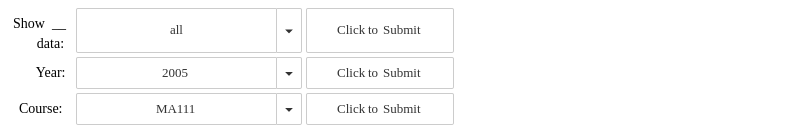

Evaluating all data...


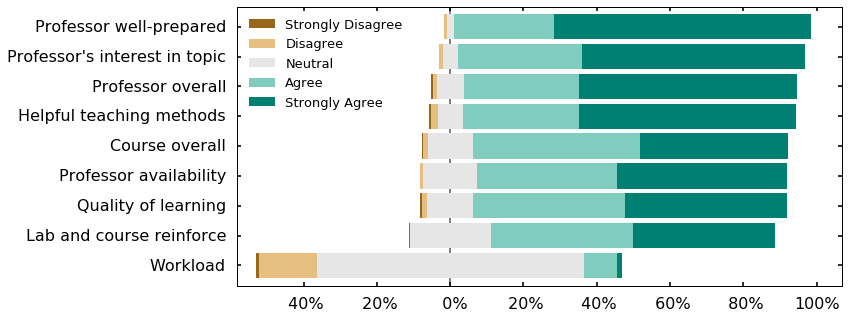

Choose a year:
Evaluating 2005 data...


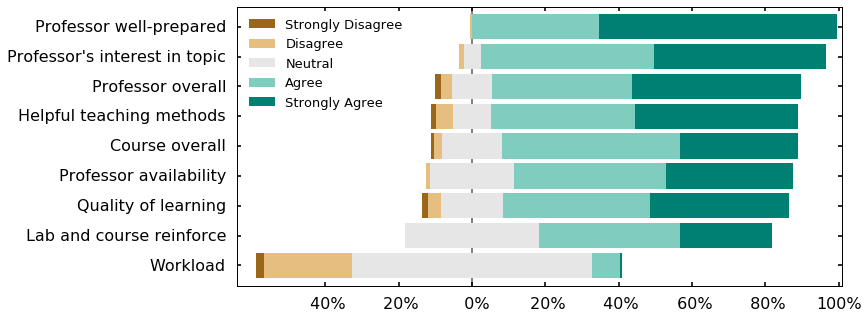

Choose a course:
Evaluating MA111 data...


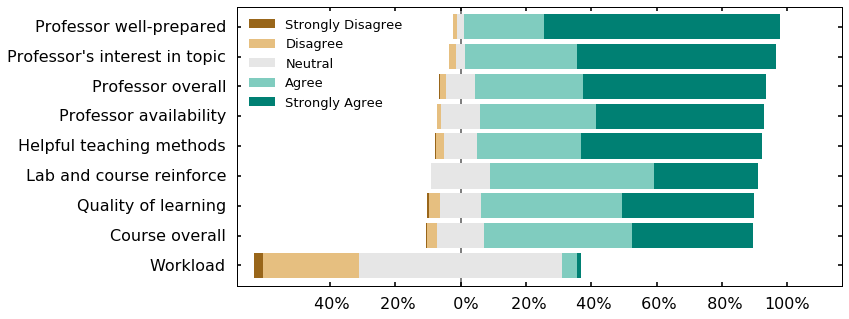

In [7]:
# main list of aggregation options
d = widgets.Dropdown(
    options=['all','yearly','by-course'],
    description='Show __ data:',
)

def on_button_clicked(clicked):
    choice = d.value
    if choice == 'all':
        print('Evaluating all data...')
        nb_kwargs = {"data": "pd.DataFrame.from_csv('" + filename + "',index_col=None)"}
        run_notebook('data_analysis.ipynb',nb_kwargs=nb_kwargs)
    
    if choice == 'yearly':
        yearly_option_selected()
    
    if choice == 'by-course':
        coursely_option_selected()

main_b = widgets.Button(description="Click to Submit")
main_b.on_click(on_button_clicked)

container = widgets.HBox(children=[d,main_b])
display(container)